In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/AUG_oil_spill00033.jpg
/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/OilSpill_00968.jpg
/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/AUG_oil_spill00138.jpg
/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/OilSpill_00935.jpg
/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/AUG_oil_spill00077.jpg
/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill/AUG_oil_spill00086.jpg
/kaggle/input/oil-spill-dataset-binary-image-classific

In [92]:
pip install keras_preprocessing


Note: you may need to restart the kernel to use updated packages.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
#from tensorflow.keras.layers.experimental import preprocessing
from pathlib import Path
import os.path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import os

In [94]:
train = '/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train'
validation = '/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation'
test ='/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test'

In [95]:
non_oil_spill_dir = os.path.join(train, 'Non Oil Spill')
oil_spill_dir = os.path.join(train, 'Oil Spill')

In [96]:
#joining
labels = ['Non Oil Spill', 'Oil Spill']

for label in labels:
    path = os.path.join('/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train')
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)

        if img_arr is not None:
            print(f"Original size of image {img}: {img_arr.shape}")

In [97]:
#conversion of image
labels = ['Non Oil Spill', 'Oil Spill']
img_size = 150
data = []

for label in labels: 
    path = os.path.join(r'/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train', label)  
    class_num = labels.index(label)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)

        if img_arr is not None: 
            img_arr = cv2.resize(img_arr, (img_size, img_size))  
            data.append([img_arr, class_num])  

In [98]:
#loading data
def load_data(directory):
    data = []
    for label in labels: 
        path = os.path.join(directory, label)  
        class_num = labels.index(label)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_arr = cv2.imread(img_path)

            if img_arr is not None: 
                img_arr = cv2.resize(img_arr, (img_size, img_size))  
                data.append([img_arr, class_num])  
    return np.array(data, dtype=object)

In [99]:
train_data = load_data(train)
test_data = load_data(test)
validation_data = load_data(validation)

In [100]:
print("Shape of training data:", train_data.shape)
print("Shape of test data:", test_data.shape)
print("Shape of valdata:", validation_data.shape)

Shape of training data: (2800, 2)
Shape of test data: (600, 2)
Shape of valdata: (600, 2)


In [101]:
#img to features
def populate_data(data):
    features, labels = zip(*data) 
    return np.array(features) / 255.0, np.array(labels) 

In [102]:
x_train, y_train = populate_data(train_data)
x_val, y_val = populate_data(load_data(validation))  
x_test, y_test = populate_data(load_data(test))    

In [103]:
#to get more data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [104]:
datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

In [105]:
from tensorflow.keras.preprocessing.image import img_to_array

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#simple one block architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), shuffle=True, batch_size=64)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.5478 - loss: 1.1458 - val_accuracy: 0.7367 - val_loss: 0.5210
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8407 - loss: 0.3853 - val_accuracy: 0.8850 - val_loss: 0.2890
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9198 - loss: 0.1967 - val_accuracy: 0.9300 - val_loss: 0.1706
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9699 - loss: 0.0946 - val_accuracy: 0.9633 - val_loss: 0.1028
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9837 - loss: 0.0608 - val_accuracy: 0.9567 - val_loss: 0.1062
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9919 - loss: 0.0344 - val_accuracy: 0.9250 - val_loss: 0.1625
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9910 - loss: 0.0364 - val_accuracy: 0.9683 - val_loss: 0.0794
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9883 - 

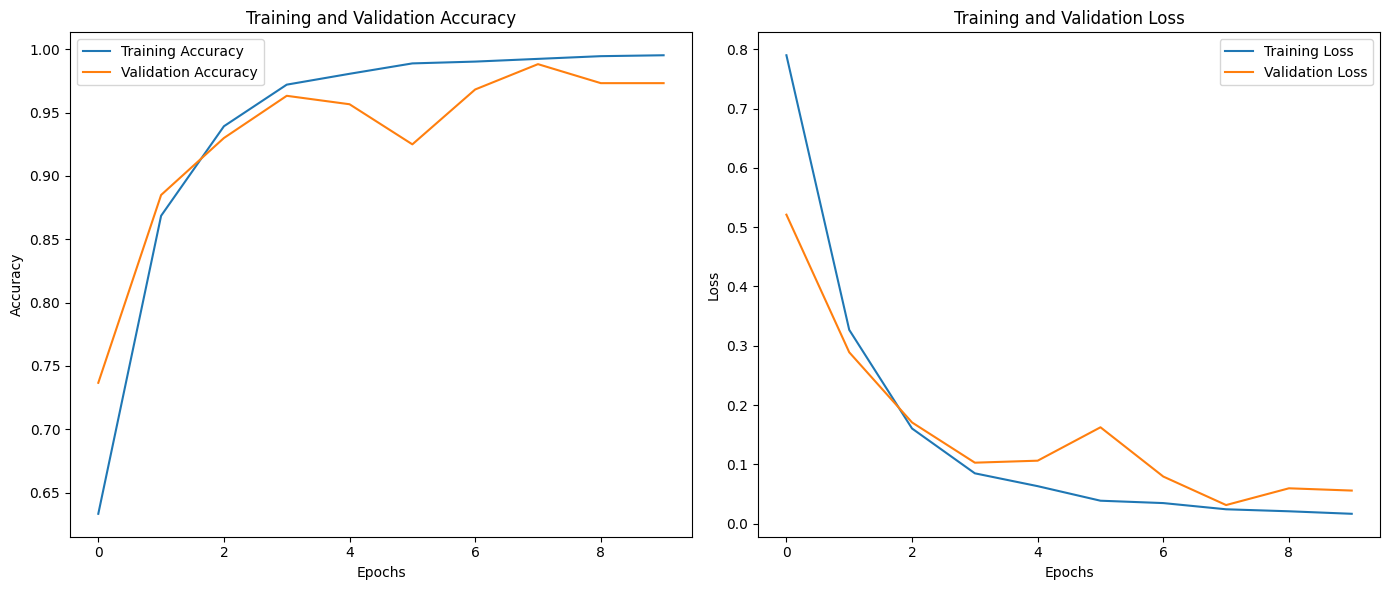

In [108]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import classification_report
y_pred_test = (model.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       300
           1       1.00      0.97      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [110]:
model.save('oil_spill_detector_model.h5')  


In [111]:
model.evaluate(x_test,y_test,batch_size=64)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9947 - loss: 0.0155


[0.04119141027331352, 0.9866666793823242]

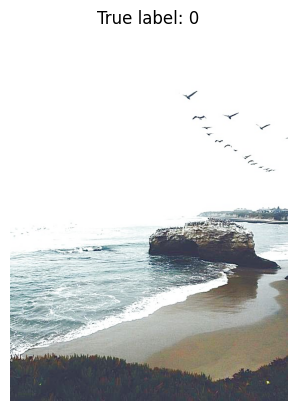

In [114]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))  
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  #
    return img_array

image_path = '/kaggle/input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test/Non Oil Spill/AUG_Non_oil_spill00155.jpg'  # Replace with your image path
true_label = 0 
plt.imshow(Image.open(image_path))
plt.axis('off')  # Hide the axis
plt.title(f"True label: {true_label}")
plt.show()

In [115]:
processed_image = load_and_preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_class = (prediction > 0.5).astype("int32")  
print("Predicted class:", predicted_class[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: 0
